The Iris flower dataset consists of three species: serosa, versicolor, and virginica.

In [1]:
pip install typing-extensions


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import  numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
iris = pd.read_csv("C:\\Users\\satya\\TASK 3 - IRIS FLOWER CLASSIFICATION\\IRIS.csv")


In [8]:
#printing how many features?
print("the dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))

the dataset has 150 rows and 5 features


In [9]:
#printing info about dataset
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**The data types are correct and we can see that there is no null values in the dataset**

In [10]:
#printing statistics about the dataset
print(iris.describe())
#py.iplot(ff.create_table(iris.describe()),filename='describe_table')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
#printing coefficient of Quartile deviation
qd = pd.DataFrame((iris.describe().loc['75%']-iris.describe().loc['25%'])/(iris.describe().loc['75%']+iris.describe().loc['25%']),columns=['COQD'])
print(qd)

                  COQD
sepal_length  0.113043
sepal_width   0.081967
petal_length  0.522388
petal_width   0.714286


In [12]:
#how many datapoints for each class are presents?
print(iris["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [13]:
#which categories of flowers we have?
print(" we have {} types of species in this dataset".format(iris.species.nunique()))
print("the names of this species are:",iris.species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


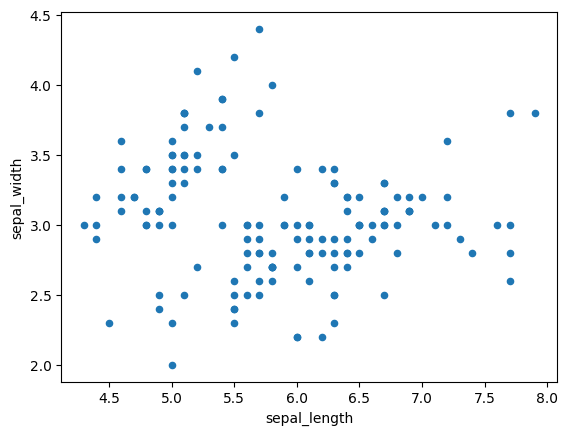

In [14]:
#2-D scatter plots
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

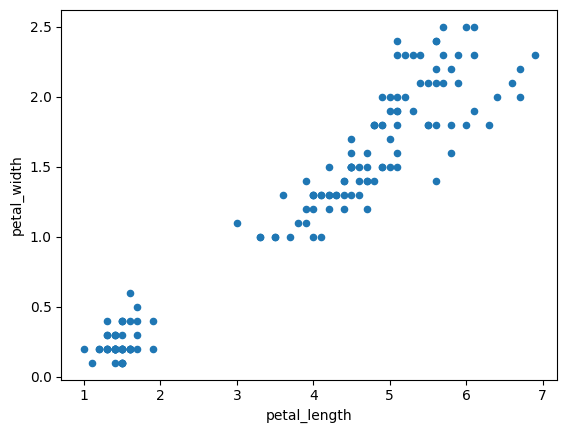

In [15]:
iris.plot(kind='scatter', x='petal_length', y='petal_width') ;
plt.show()

* cannot make much sense out it.
* What if we color the points by thier class-label/flower-type.

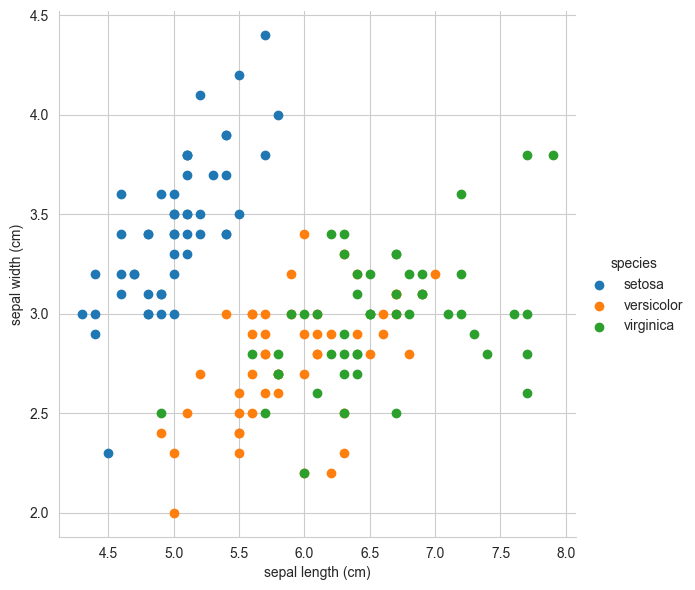

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Create a 2-D scatter plot with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=6)\
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)")\
   .add_legend()
plt.show()


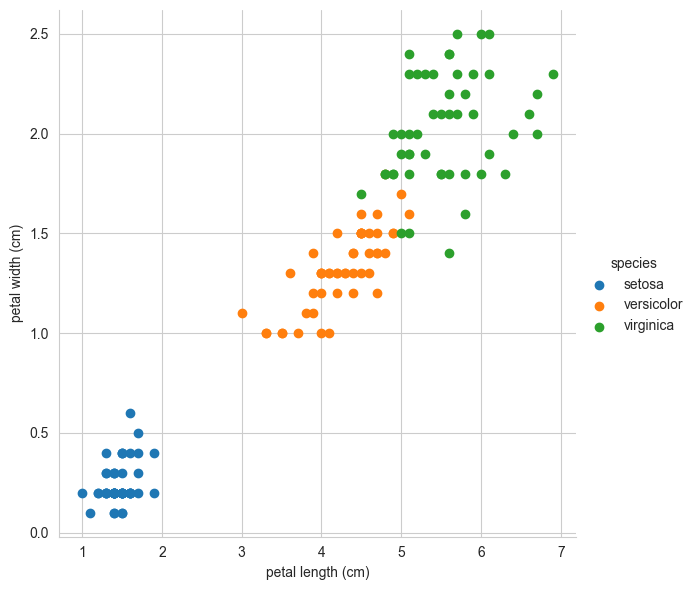

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Create a 2-D scatter plot with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=6)\
   .map(plt.scatter, "petal length (cm)", "petal width (cm)")\
   .add_legend()
plt.show()


* Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
* Seperating Versicolor from Viginica is much harder as they have considerable overlap.

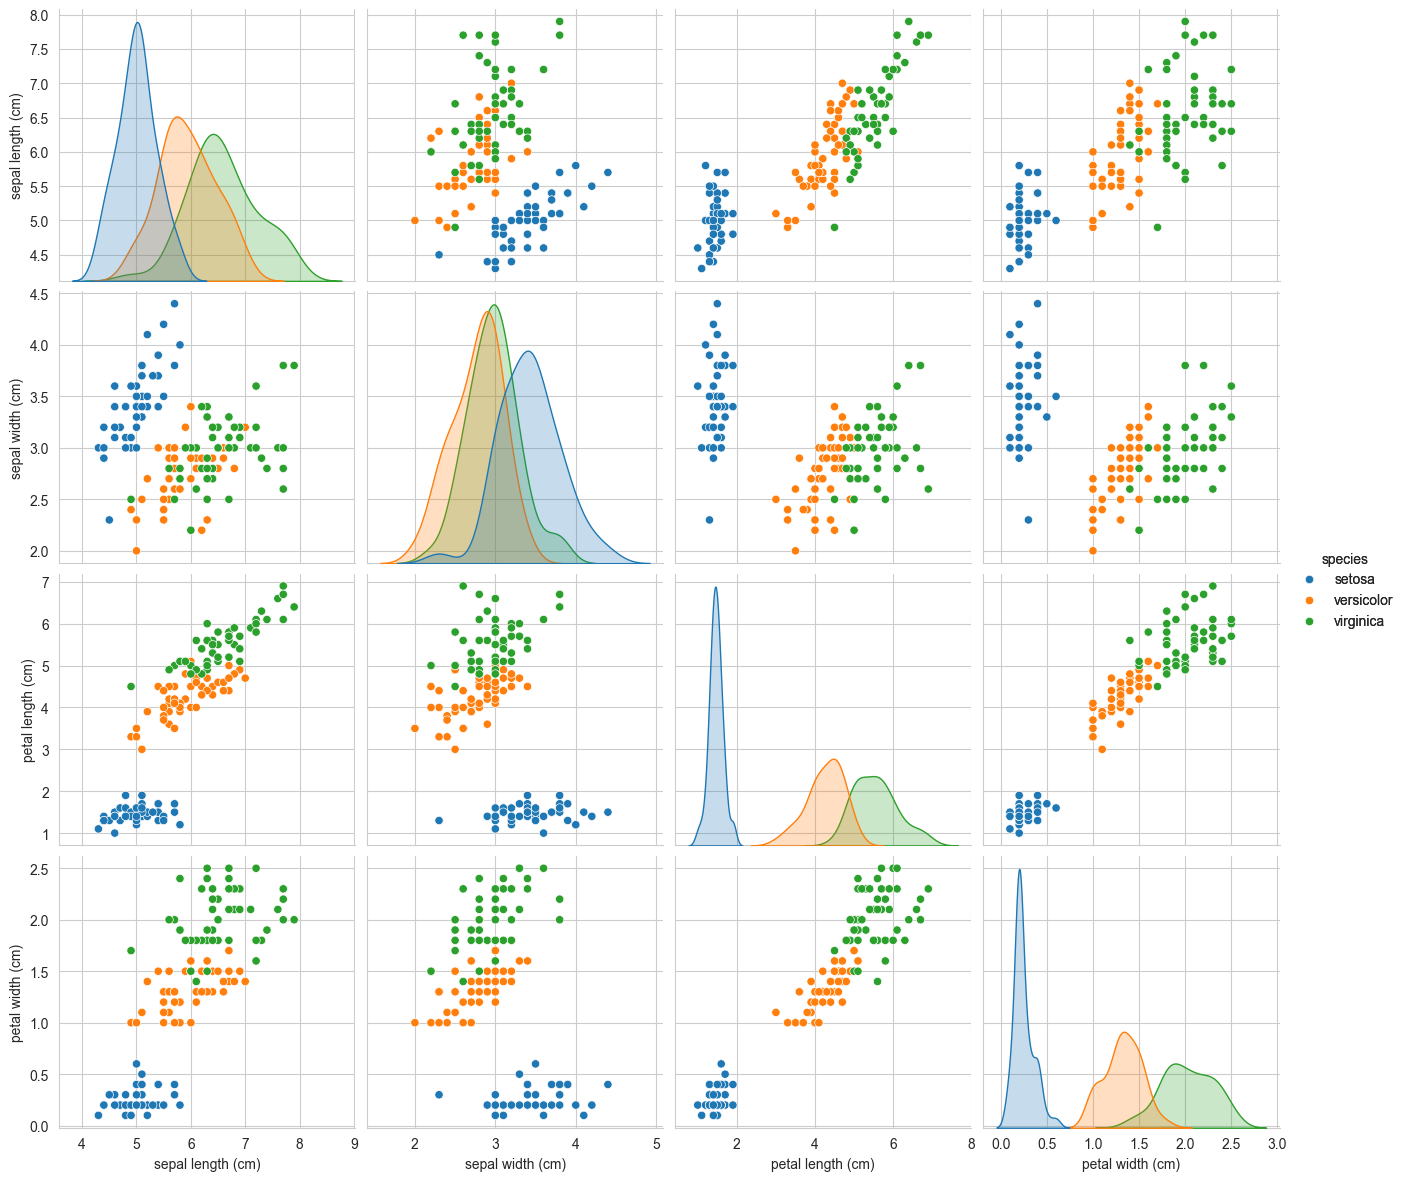

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Create a pair-plot with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.pairplot(data=iris_df, hue="species", height=3)\
   .add_legend()
plt.show()


* petal_length and petal_width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
* We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

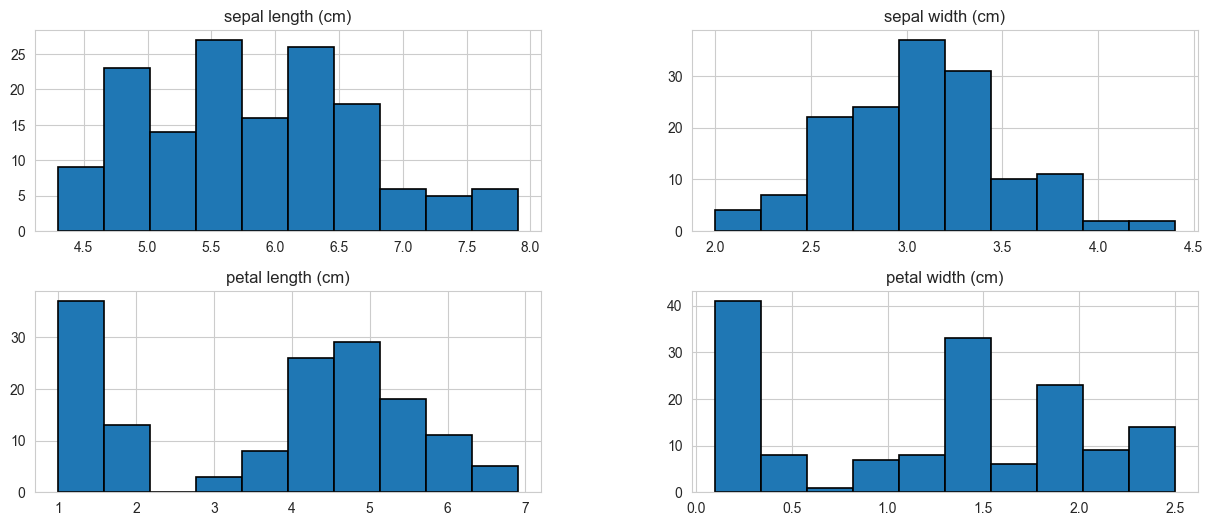

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot histograms for each feature
iris_df.hist(edgecolor='black', linewidth=1.2, figsize=(15, 6))
plt.show()


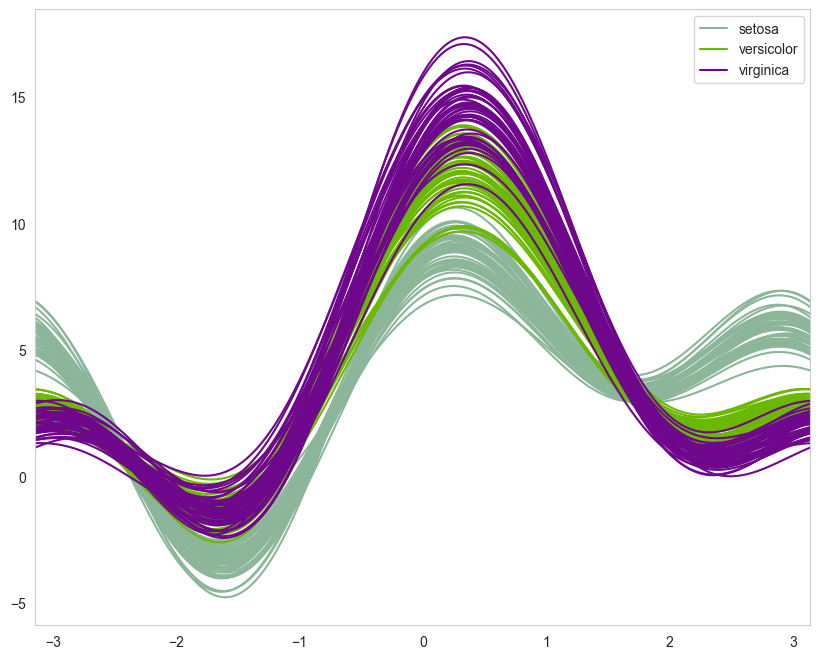

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot Andrews curves
plt.figure(figsize=(10, 8))
andrews_curves(iris_df, 'species')
plt.show()


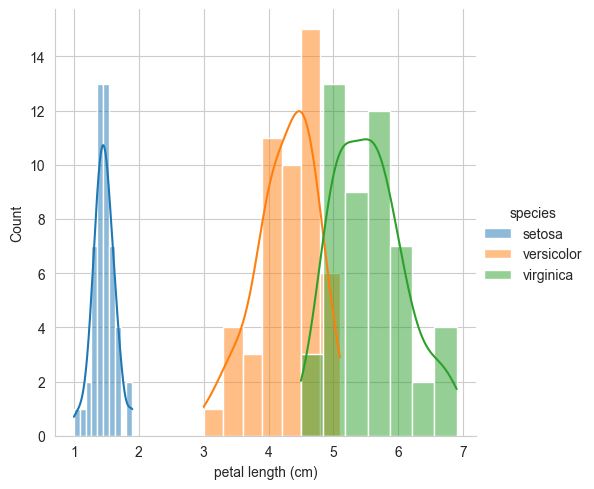

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot distribution of petal length with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=5) \
   .map(sns.histplot, "petal length (cm)", kde=True) \
   .add_legend()
plt.show()


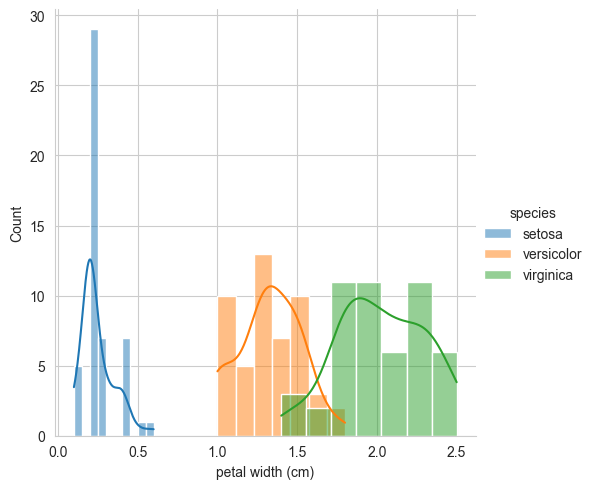

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot distribution of petal width with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=5) \
   .map(sns.histplot, "petal width (cm)", kde=True) \
   .add_legend()
plt.show()


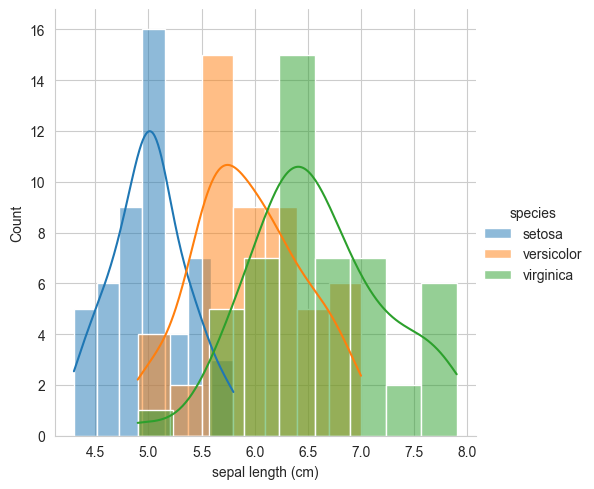

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot distribution of sepal length with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=5) \
   .map(sns.histplot, "sepal length (cm)", kde=True) \
   .add_legend()
plt.show()


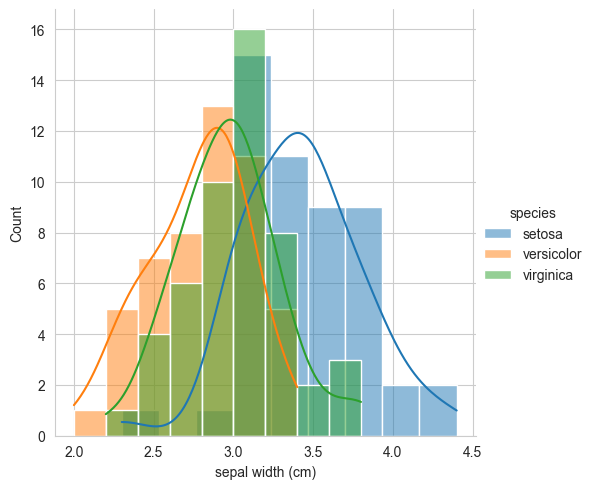

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot distribution of sepal width with color-coding for each flower type/class
sns.set_style("whitegrid")
sns.FacetGrid(data=iris_df, hue="species", height=5) \
   .map(sns.histplot, "sepal width (cm)", kde=True) \
   .add_legend()
plt.show()


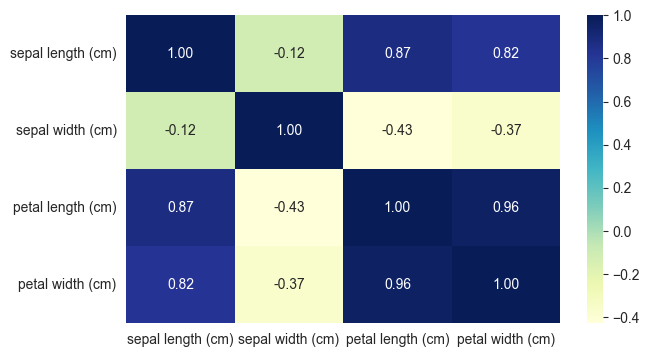

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute the correlation matrix
corr_matrix = iris_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()


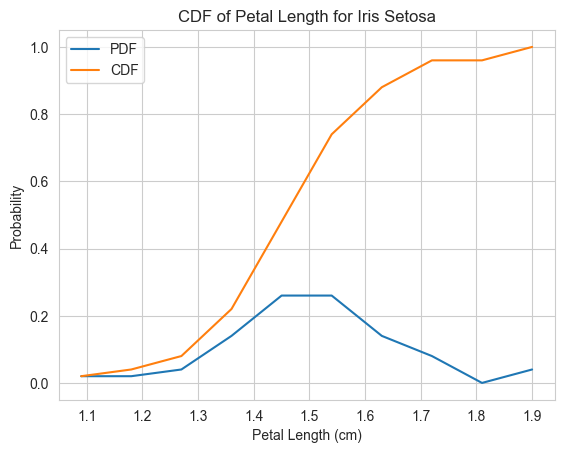

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Filter data for Iris setosa
iris_setosa = iris_df[iris_df['species'] == 'setosa']

# Calculate CDF
counts, bin_edges = np.histogram(iris_setosa['petal length (cm)'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

# Plotting
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.legend()
plt.title('CDF of Petal Length for Iris Setosa')
plt.show()


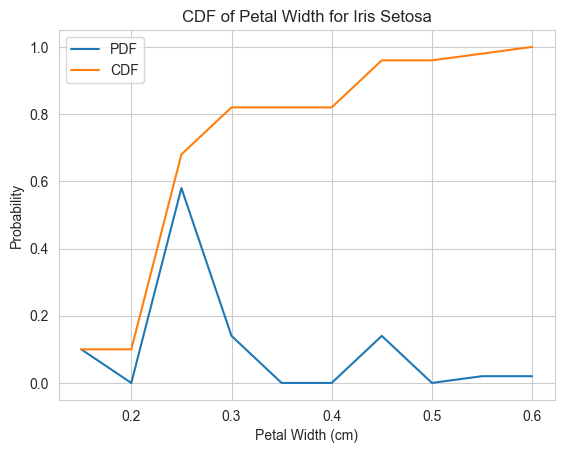

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Filter data for Iris setosa
iris_setosa = iris_df[iris_df['species'] == 'setosa']

# Calculate CDF
counts, bin_edges = np.histogram(iris_setosa['petal width (cm)'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

# Plotting
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.title('CDF of Petal Width for Iris Setosa')
plt.show()


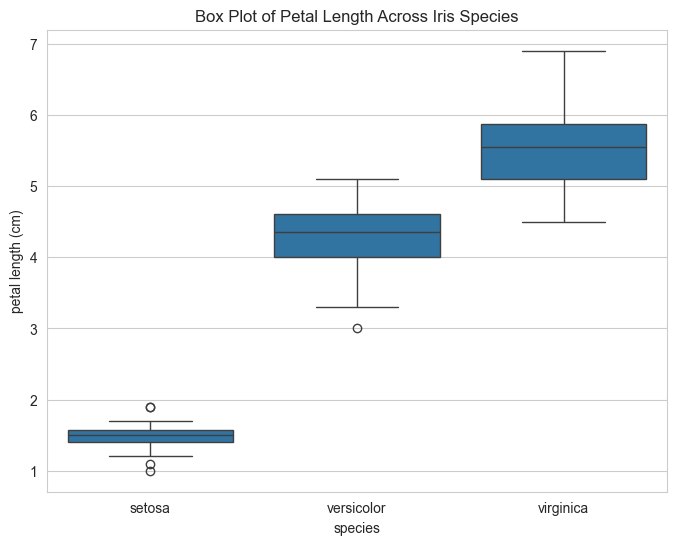

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Box plot with whiskers for petal_length across different species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Box Plot of Petal Length Across Iris Species')
plt.show()


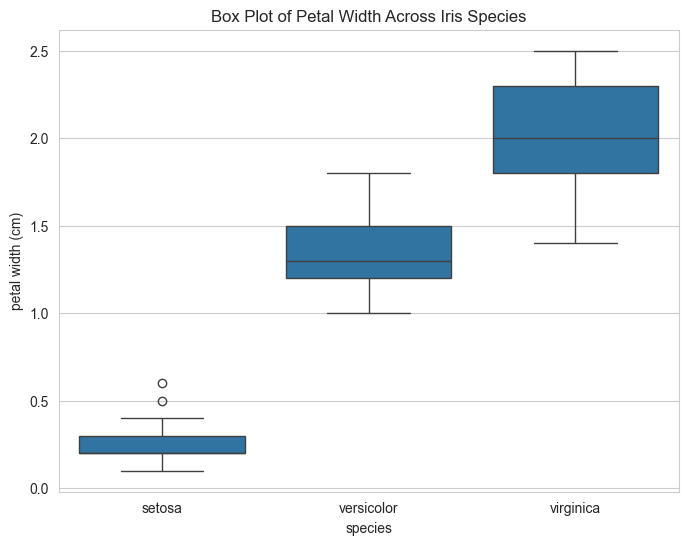

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Box plot with whiskers for petal_width across different species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.title('Box Plot of Petal Width Across Iris Species')
plt.show()


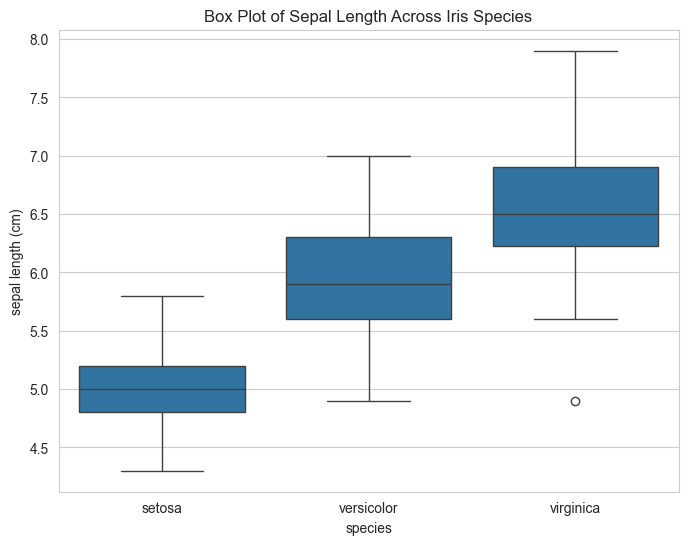

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Box plot with whiskers for sepal_length across different species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Box Plot of Sepal Length Across Iris Species')
plt.show()


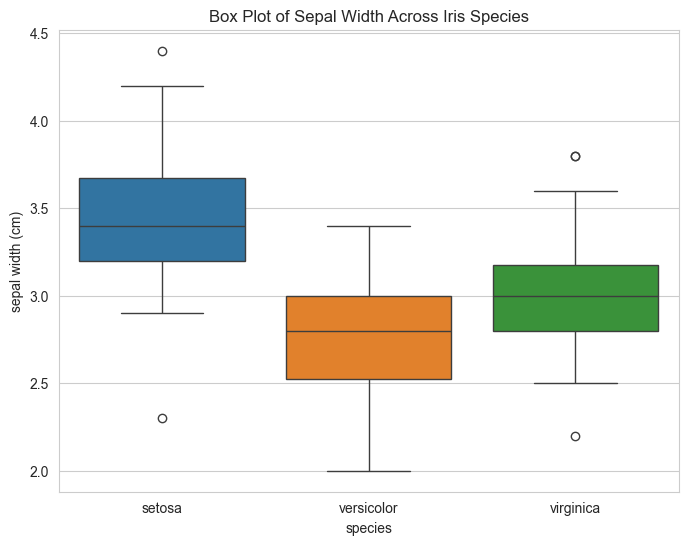

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Box plot with whiskers for sepal_width across different species, differentiated by hue
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df, hue='species')
plt.title('Box Plot of Sepal Width Across Iris Species')
plt.show()


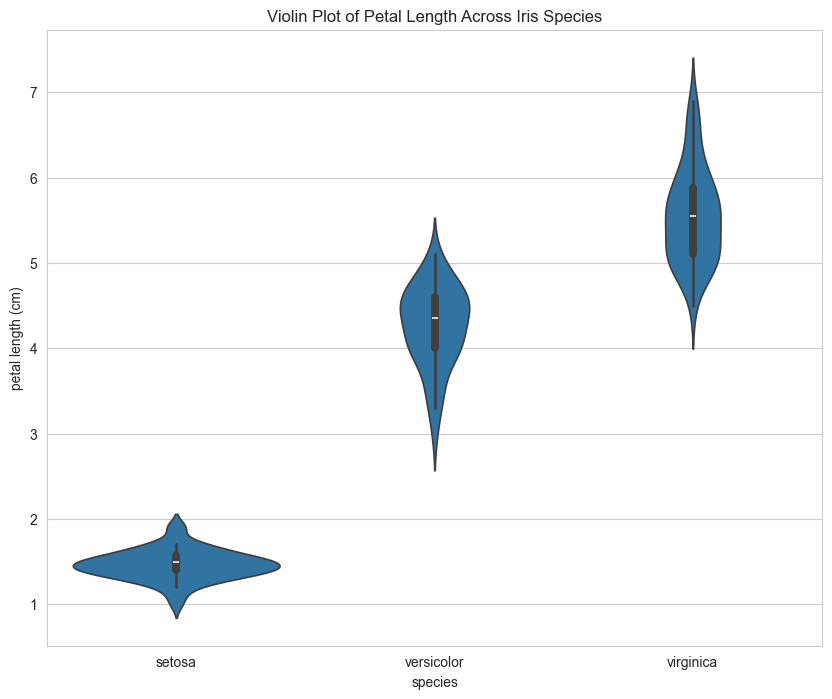

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Violin plot for petal_length across different species
plt.figure(figsize=(10, 8))
sns.violinplot(x="species", y="petal length (cm)", data=iris_df)
plt.title('Violin Plot of Petal Length Across Iris Species')
plt.show()


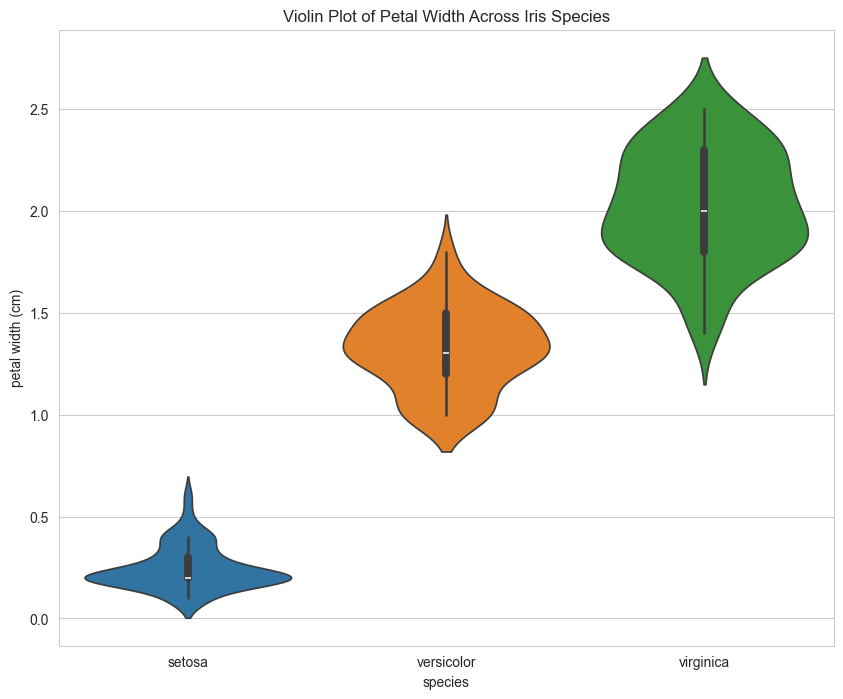

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Violin plot for petal_width across different species, differentiated by hue
plt.figure(figsize=(10, 8))
sns.violinplot(x="species", y="petal width (cm)", data=iris_df, hue="species")
plt.title('Violin Plot of Petal Width Across Iris Species')
plt.show()


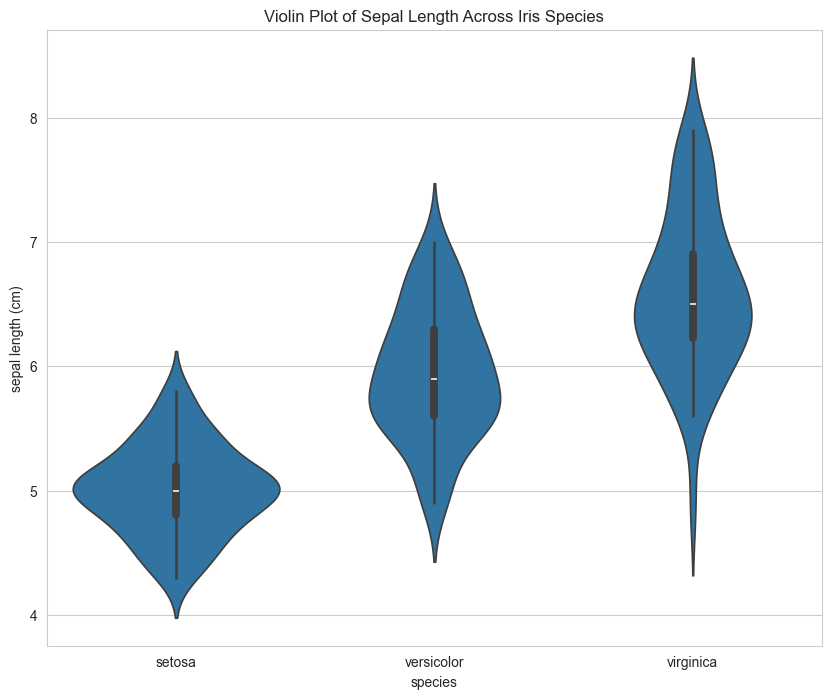

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Violin plot for sepal_length across different species
plt.figure(figsize=(10, 8))
sns.violinplot(x="species", y="sepal length (cm)", data=iris_df)
plt.title('Violin Plot of Sepal Length Across Iris Species')
plt.show()


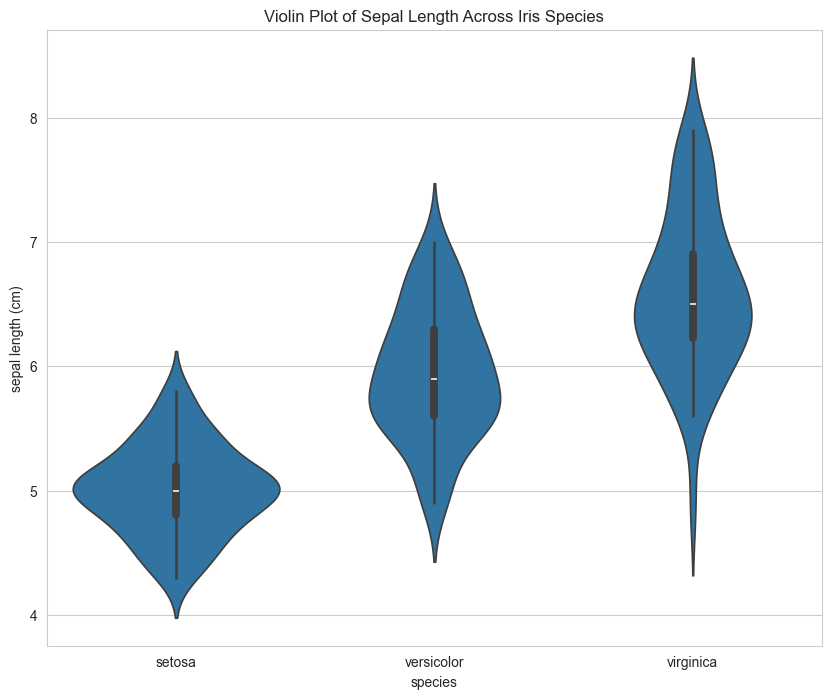

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Violin plot for sepal_length across different species
plt.figure(figsize=(10, 8))
sns.violinplot(x="species", y="sepal length (cm)", data=iris_df)
plt.title('Violin Plot of Sepal Length Across Iris Species')
plt.show()


In [36]:
# #splitting of data
# X_train, X_test, y_train,y_test = train_test_split(iris.iloc[:,:4],iris.species,stratify=iris.species,test_size = 0.3)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


In [37]:
#random samples of training data
print(X_train)


[[5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]
 [5.7 2.8 4.1 1.3]
 [6.7 3.  5.2 2.3]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [7.1 3.  5.9 2.1]
 [6.5 3.2 5.1 2. ]
 [4.9 3.  1.4 0.2]
 [5.  3.  1.6 0.2]
 [6.  2.9 4.5 1.5]
 [5.5 2.4 3.8 1.1]
 [7.2 3.2 6.  1.8]
 [5.  3.4 1.6 0.4]
 [4.7 3.2 1.6 0.2]
 [6.7 3.3 5.7 2.5]
 [5.9 3.2 4.8 1.8]
 [5.4 3.4 1.5 0.4]
 [6.3 2.7 4.9 1.8]
 [7.6 3.  6.6 2.1]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.6 3.4 1.4 0.3]
 [5.1 3.7 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [6.9 3.1 4.9 1.5]
 [5.5 2.5 4.  1.3]
 [5.7 4.4 1.5 0.4]
 [5.1 3.5 1.4 0.3]
 [5.8 2.7 4.1 1. ]
 [5.6 2.9 3.6 1.3]
 [4.8 3.  1.4 0.1]
 [4.8 3.  1.4 0.3]
 [6.7 3.1 4.4 1.4]
 [6.3 2.5 5.  1.9]
 [7.9 3.8 6.4 2. ]
 [5.1 3.5 1.4 0.2]
 [6.4 2.8 5.6 2.1]
 [4.6 3.2 1.4 0.2]
 [6.  2.2 5.  1.5]
 [5.5 3.5 1.3 0.2]
 [6.3 3.3 6.  2.5]
 [6.  2.2 4.  1. ]
 [4.8 3.4 1.9 0.2]
 [7.7 3.  6.1 2.3]
 [6.1 2.8 4.  1.3]
 [5.7 2.5 5.  2. ]
 [5.8 2.7 3.9 1.2]
 [4.5 2.3 1.3 0.3]
 [5.5 2.4 3.

In [38]:

print(X_train[:5])  # Prints the first 5 rows


[[5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]
 [5.7 2.8 4.1 1.3]]


In [39]:
#training svc model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

# Evaluating the model
print("The accuracy of the Support Vector Machine Classifier model is:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


The accuracy of the Support Vector Machine Classifier model is: 0.9555555555555556
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [40]:
#training logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_predict = lg_model.predict(X_test)

# Evaluating the model
print("The accuracy of the Logistic Regression Classifier model is:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


The accuracy of the Logistic Regression Classifier model is: 0.9333333333333333
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#training decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the Decision Tree Classifier model
dtc_model = DecisionTreeClassifier(max_leaf_nodes=3)
dtc_model.fit(X_train, y_train)
y_predict = dtc_model.predict(X_test)

# Evaluating the model
print("The accuracy of the Decision Tree Classifier model is:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


The accuracy of the Decision Tree Classifier model is: 0.8888888888888888
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]


In [42]:
#training extra tree classfier model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the Extra Trees Classifier model
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
etc_prediction = etc_model.predict(X_test)

# Evaluating the model
print('The accuracy of the Extra Trees Classifier model is:', accuracy_score(etc_prediction, y_test))
print('Confusion Matrix:')
print(confusion_matrix(etc_prediction, y_test))


The accuracy of the Extra Trees Classifier model is: 0.9111111111111111
Confusion Matrix:
[[15  0  0]
 [ 0 14  3]
 [ 0  1 12]]


In [43]:
#training KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predicting with the model
knn_prediction = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, knn_prediction)
print('The accuracy of the K-Nearest Neighbors (KNN) model is:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn_prediction))


The accuracy of the K-Nearest Neighbors (KNN) model is: 0.9555555555555556
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [44]:
#training gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predicting with the model
gnb_prediction = gnb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, gnb_prediction)
print('The accuracy of the Gaussian Naive Bayes model is:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix(y_test, gnb_prediction))



The accuracy of the Gaussian Naive Bayes model is: 0.9111111111111111
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [45]:
#training random forest classfier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the Random Forest Classifier model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# Predicting with the model
rfc_prediction = rfc_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, rfc_prediction)
print('The accuracy of the Random Forest Classifier model is:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rfc_prediction))


The accuracy of the Random Forest Classifier model is: 0.8888888888888888
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [46]:
#training XGboost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    test_size=0.3, random_state=42)

# Training the XGBoost Classifier model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predicting with the model
xgb_prediction = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, xgb_prediction)
print('The accuracy of the XGBoost Classifier model is:', accuracy)
print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_prediction))


The accuracy of the XGBoost Classifier model is: 0.9333333333333333
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [47]:
#lets try to build a Deep learning model with keras
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Selecting features and target
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Scaling features
X_scaled = StandardScaler().fit_transform(X)

# Binarizing target
y_binarized = LabelBinarizer().fit_transform(y)

# Example of usage: Printing the first few rows of scaled features and binarized target
print(X_scaled[:5])
print(y_binarized[:5])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Selecting features and target
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Scaling features
X_scaled = StandardScaler().fit_transform(X)

# Binarizing target
y_binarized = LabelBinarizer().fit_transform(y)

# Building the neural network model
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Example of usage: Training the model
model.fit(X_scaled, y_binarized, epochs=100, batch_size=10, verbose=1)


c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3894 - loss: 1.4998
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3806 - loss: 1.4174 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4171 - loss: 1.2902 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3707 - loss: 1.2384 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4329 - loss: 1.1134 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3654 - loss: 1.0883 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4115 - loss: 1.0400 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.5067 - loss: 0.9761
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 0.9503 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6810 - loss: 0.8678 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.8498 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


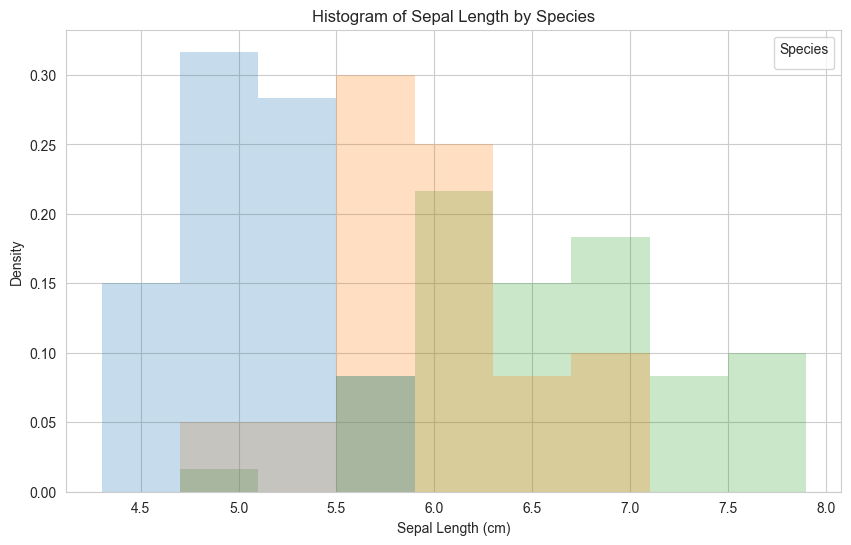

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Plot histograms with different colors (hue) for each species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', element='step', stat='density', linewidth=0)
plt.title('Histogram of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_11188\2432311364.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y='Accuracy', data=df, palette='viridis')


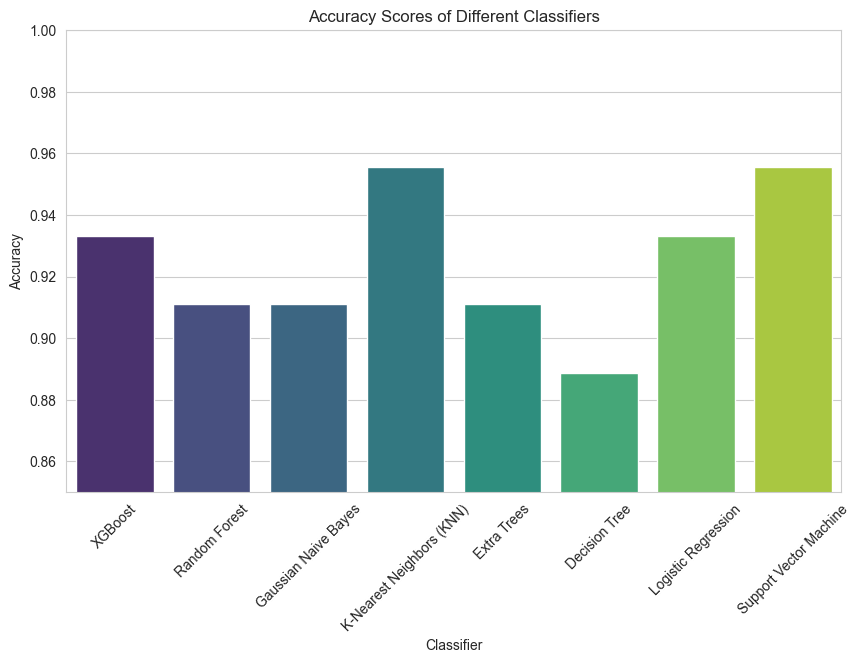

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example accuracy scores (replace these with your actual scores)
accuracy_scores = {
    'XGBoost': 0.9333333333333333,
    'Random Forest': 0.9111111111111111,
    'Gaussian Naive Bayes': 0.9111111111111111,
    'K-Nearest Neighbors (KNN)': 0.955555555555555,
    'Extra Trees': 0.9111111111111111,
    'Decision Tree': 0.8888888888888888,
    'Logistic Regression': 0.9333333333333333,
    'Support Vector Machine': 0.9555555555555556
}

# Convert dictionary to DataFrame for plotting
df = pd.DataFrame(list(accuracy_scores.items()), columns=['Classifier', 'Accuracy'])

# Plotting histogram with different hues
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=df, palette='viridis')
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)  # Adjust y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
